## IPL data Analysis

In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [218]:
match_data = pd.read_csv("matches.csv")
ball_data  = pd.read_csv("deliveries.csv")

In [219]:
match_data.head()
 

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [220]:
#df. rename(columns = {'old_col1':'new_col1', 'old_col2':'new_col2'}, inplace = True)

ball_data.rename(columns = {'match_id' : 'id'}, inplace = True)

In [221]:
ball_data.head(10)

,id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,0,0,1,0,0,1,1,NaN,NaN,NaN


In [222]:
match_data.shape

(756, 18)

In [223]:
ball_data.shape

(179078, 21)

In [224]:
match_data.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [225]:
ball_data.isnull().sum()

id                       0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [226]:
print("Matches played so far", match_data.shape[0])
print('\n Cities played at: ', match_data['city'].unique())
print('\n Teams participated:',match_data['team1'].unique())

Matches played so far 756

 Cities played at:  ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru']

 Teams participated: ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']


### Extracting the year value from the date column

In [227]:
match_data['Season'] = pd.DatetimeIndex(match_data['date']).year
match_data.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [228]:
match_per_season = match_data.groupby(['Season'])['id'].count().reset_index().rename(columns={'id':'matches'})

In [229]:
match_per_season

,Season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


### Displaying a bargraph to show number of matches played each year

Text(0.5, 1.0, 'Total maches played in each season')

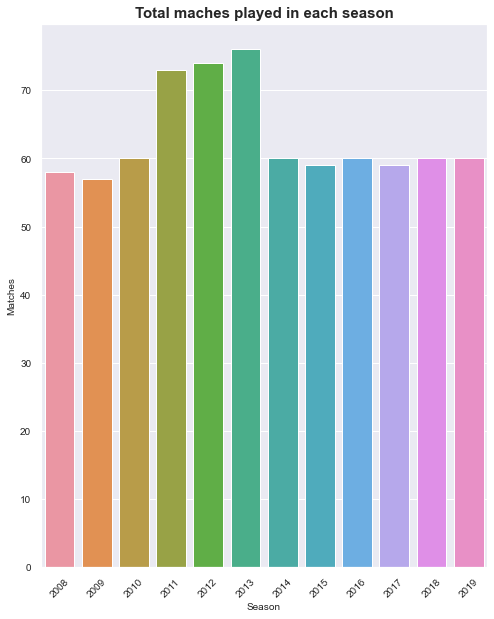

In [230]:
sns.countplot(match_data['Season'])
plt.xticks(rotation=45, fontsize = 10)
plt.yticks(fontsize=10)
plt.xlabel('Season', fontsize=10)
plt.ylabel('Matches', fontsize = 10)
plt.title('Total maches played in each season', fontsize = 15, fontweight = "bold")

In [231]:
season_data = match_data[['id','Season']].merge(ball_data,left_on = 'id', right_on = 'id', how = 'left').drop('id', axis = 1)

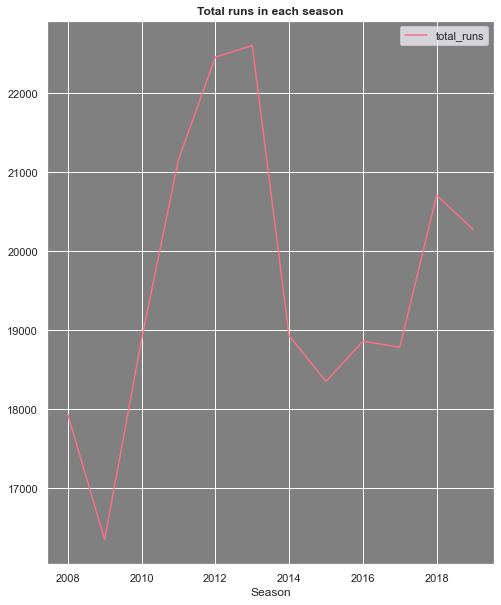

In [232]:
### Total run scored in each season
season = season_data.groupby(['Season'])['total_runs'].sum().reset_index()
p = season.set_index('Season')
ax = plt.axes()
ax.set(facecolor = "grey")
sns.lineplot(data=p,palette="husl")
plt.title('Total runs in each season', fontsize = 12, fontweight="bold")
plt.show()

In [233]:
runs_per_season = pd.concat([match_per_season,season.iloc[:,1]],axis=1)

In [234]:
runs_per_season['runs scored per match'] = runs_per_season['total_runs']/runs_per_season['matches']

In [235]:
runs_per_season

,Season,matches,total_runs,runs scored per match
0,2008,58,17937,309.258621
1,2009,57,16353,286.894737
2,2010,60,18883,314.716667
3,2011,73,21154,289.780822
4,2012,74,22453,303.418919
5,2013,76,22602,297.394737
6,2014,60,18931,315.516667
7,2015,59,18353,311.067797
8,2016,60,18862,314.366667
9,2017,59,18786,318.406780


In [236]:
match_data.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [237]:
##Horrizontal bar graph:
toss = match_data['toss_winner'].value_counts()

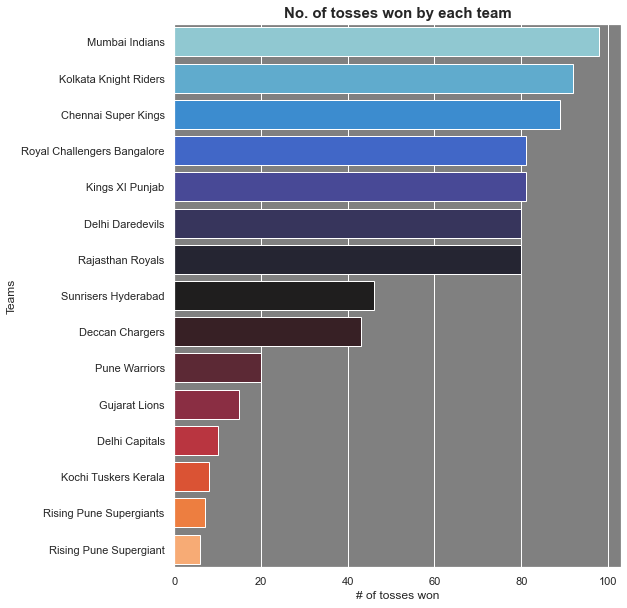

In [238]:
ax = plt.axes()
ax.set(facecolor = "grey")
sns.set(rc={'figure.figsize':(8,10)},style='darkgrid')
ax.set_title('No. of tosses won by each team', fontsize=15, fontweight="bold")
sns.barplot(y=toss.index, x=toss, orient='h',palette="icefire",saturation=1)
plt.xlabel('# of tosses won')
plt.ylabel('Teams')
plt.show()


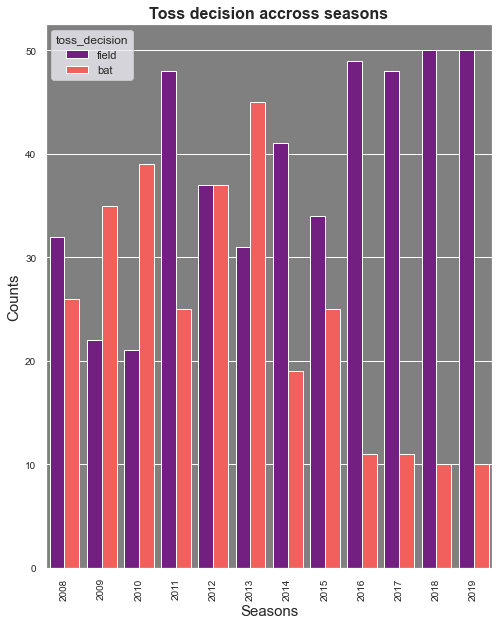

In [239]:
ax = plt.axes()
ax.set(facecolor = "grey")
sns.countplot(x='Season', hue='toss_decision', data=match_data, palette="magma", saturation=1)
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Counts', fontsize=15)
plt.xlabel('Seasons', fontsize = 15)
plt.title('Toss decision accross seasons', fontsize=16, fontweight="bold")
plt.show()

In [240]:
match_data['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [241]:
match_data.venue[match_data.result!='runs'].mode()

0    Eden Gardens
dtype: object

In [242]:
match_data.venue[match_data.result!='wickets'].mode()

0    Eden Gardens
dtype: object

In [243]:
 match_data.venue[match_data.toss_winner=='Mumbai Indians'][match_data.winner=='Mumbai Indians'].mode()

0    Wankhede Stadium
dtype: object

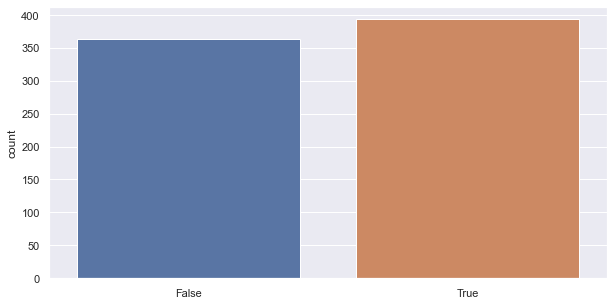

In [244]:
toss = match_data['toss_winner'] == match_data['winner']
plt.figure(figsize = (10,5))
sns.countplot(toss)
plt.show()

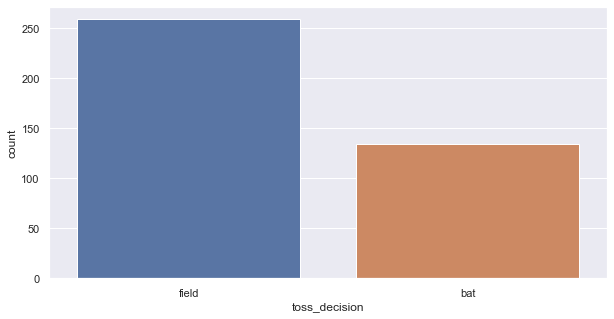

In [245]:
### Checking whether toss winning team also wins the match or not

plt.figure(figsize = (10,5))
sns.countplot(match_data.toss_decision[match_data.toss_winner == match_data.winner])
plt.show()

In [246]:
match_data['toss_decision'].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

In [247]:
player = (ball_data['batsman']=='SK Raina')
df_raina=ball_data[player]
df_raina.head()

,id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
515,3,1,Gujarat Lions,Kolkata Knight Riders,4,2,SK Raina,BB McCullum,PP Chawla,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
516,3,1,Gujarat Lions,Kolkata Knight Riders,4,3,SK Raina,BB McCullum,PP Chawla,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
520,3,1,Gujarat Lions,Kolkata Knight Riders,5,1,SK Raina,BB McCullum,SP Narine,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
526,3,1,Gujarat Lions,Kolkata Knight Riders,6,1,SK Raina,BB McCullum,CR Woakes,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
527,3,1,Gujarat Lions,Kolkata Knight Riders,6,2,SK Raina,BB McCullum,CR Woakes,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


### Blow graph shows how Suresh Raina has dismissed throughout the IPL 

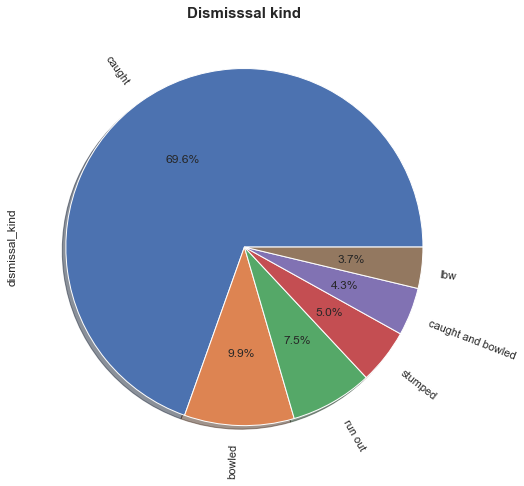

In [248]:
df_raina['dismissal_kind'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, rotatelabels=True)
plt.title("Dismisssal kind", fontweight="bold", fontsize=15)
plt.show()

In [249]:
def count(df_raina, runs):
    

IndentationError: expected an indented block (1874871412.py, line 2)

In [250]:
df_raina['batsman_runs'].value_counts()

1    1695
0    1381
4     495
2     266
6     195
3      11
5       1
Name: batsman_runs, dtype: int64

<AxesSubplot:xlabel='batsman_runs', ylabel='count'>

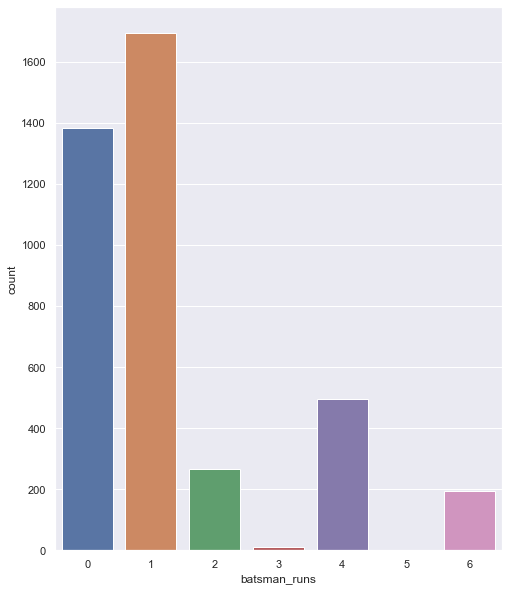

In [251]:
sns.countplot(df_raina['batsman_runs'])

In [252]:
### Match that has the highest difference by margin
match_data.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [253]:
match_data[match_data['win_by_runs']==match_data['win_by_runs'].max()]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
43,44,2017,Delhi,06-05-2017,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN


In [254]:
#### Players who scores maximum number of runs in IPL

ball_data.shape

(179078, 21)

In [255]:
ball_data.value_counts('batsman')

batsman
V Kohli        4211
SK Raina       4044
RG Sharma      3816
S Dhawan       3776
G Gambhir      3524
               ... 
P Raj             1
Sunny Gupta       1
LH Ferguson       1
C Nanda           1
S Kaushik         1
Length: 516, dtype: int64

In [256]:
ball_data.head()

,id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [257]:
print(ball_data['total_runs'].sum())

235290


In [258]:
runs_data = ball_data.groupby('batsman')['total_runs'].sum().reset_index()

In [262]:
runs_data.head()

,batsman,total_runs
0,A Ashish Reddy,288
1,A Chandila,4
2,A Chopra,58
3,A Choudhary,25
4,A Dananjaya,4


In [263]:
### Top 10 players based on total runs
runs_data.sort_values(by="total_runs", ascending = False).reset_index()

,index,batsman,total_runs
0,428,SK Raina,5651
1,486,V Kohli,5616
2,367,RG Sharma,5057
3,112,DA Warner,4975
4,392,S Dhawan,4876
...,...,...,...
511,182,J Denly,0
512,487,V Pratap Singh,0
513,55,Abdur Razzak,0
514,463,Sunny Gupta,0


In [264]:
runs_data = runs_data.sort_values(by="total_runs", ascending = False).reset_index()

In [265]:
runs_data.head(10)

,index,batsman,total_runs
0,428,SK Raina,5651
1,486,V Kohli,5616
2,367,RG Sharma,5057
3,112,DA Warner,4975
4,392,S Dhawan,4876
5,92,CH Gayle,4873
6,384,RV Uthappa,4703
7,290,MS Dhoni,4691
8,26,AB de Villiers,4583
9,147,G Gambhir,4485


In [266]:
runs_data1 = runs_data[runs_data['total_runs']>4000]
 

In [267]:
runs_data1.head()

,index,batsman,total_runs
0,428,SK Raina,5651
1,486,V Kohli,5616
2,367,RG Sharma,5057
3,112,DA Warner,4975
4,392,S Dhawan,4876


<AxesSubplot:ylabel='total_runs'>

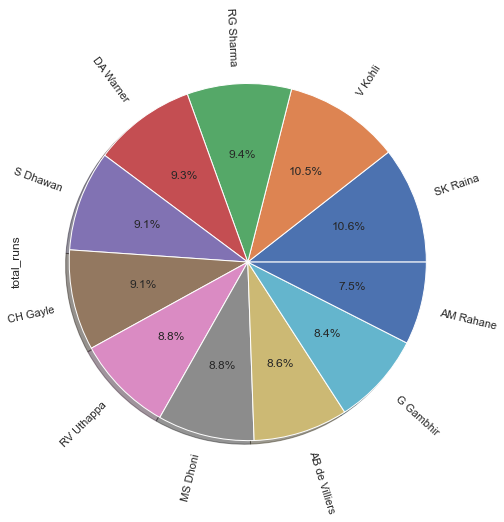

In [268]:
runs_data1['total_runs'].plot.pie(autopct='%1.1f%%', shadow=True, rotatelabels=True,labels=runs_data1['batsman'])

Text(0.5, 1.0, 'Top 10 run scorers in IPL')

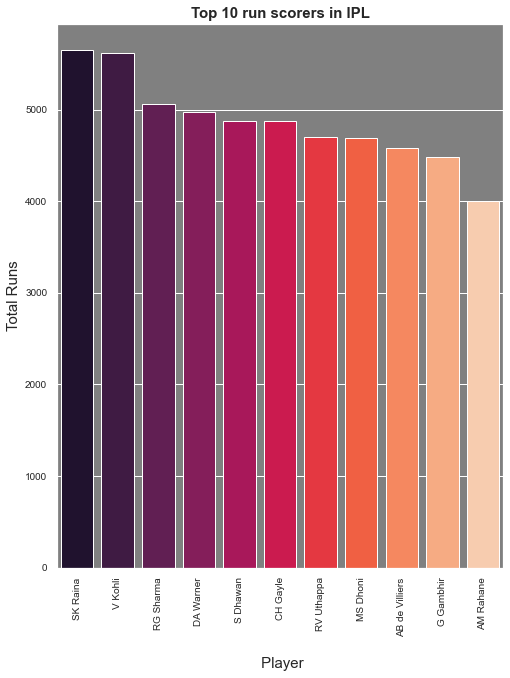

In [273]:
ax = plt.axes()
ax.set(facecolor = "grey")
sns.barplot(x=runs_data1['batsman'], y=runs_data1['total_runs'],palette='rocket',saturation=1)
plt.xticks(rotation=90, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('\n Player', fontsize = 15)
plt.ylabel('Total Runs', fontsize = 15)
plt.title('Top 10 run scorers in IPL', fontsize = 15, fontweight = "bold")

Text(0.5, 1.0, 'Highest MOM award Winners')

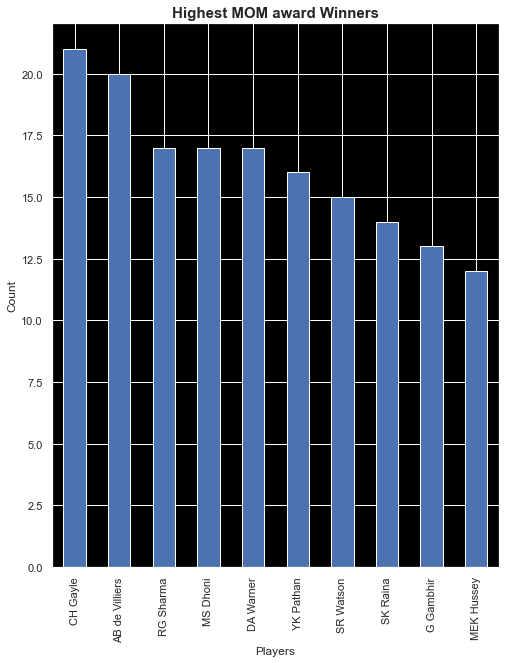

In [276]:
### Player of the match
ax = plt.axes()
ax.set(facecolor = "black")
match_data.player_of_match.value_counts()[:10].plot(kind='bar')
plt.xlabel('Players')
plt.ylabel("Count")
plt.title("Highest MOM award Winners", fontsize=15,fontweight="bold")